Aufgabe 6: <br>
Diese Aufgabe befasst sich mit dem Auto-Datensatz (auto.csv). Bearbeiten Sie die Aufgabe sowohl in JMP als auch mit Python. Stellen Sie sicher, dass die fehlenden Werte aus den Daten entfernt wurden.

In [1]:
import os, sys
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils import (cramers_v_matrix, 
                   cat_corr_heatmap, 
                   num_corr_heatmap, 
                   plot_bar_against, 
                   plot_strip_against, 
                   plot_line_against, 
                   plot_point_against)

In [3]:
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)
healthy_orange = '#EC6602'
healthy_orange_50 = '#F9B591'
healthy_orange_25 = '#FDDDCB'
siemens_petrol = '#009999'
siemens_petrol_50 = '#87D2D2'
sns.set_palette([healthy_orange, siemens_petrol, healthy_orange_50, healthy_orange_25, siemens_petrol_50])
RANDOM_SEED = 42

In [4]:
df = pd.read_csv('../data/auto.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
df.isna().mean()

mpg             0.0
cylinders       0.0
displacement    0.0
horsepower      0.0
weight          0.0
acceleration    0.0
year            0.0
origin          0.0
name            0.0
dtype: float64

> Schauen, ob wir welche Null Werte haben, in diesem Fall keine!

In [6]:
df.duplicated().mean()

0.0

> Schauen, ob wir Duplicated Werte haben, auch keine!

a) Welche möglichen Prädiktoren sind quantitativ und welche sind qualitativ?

In [7]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [8]:
df.cylinders.value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

In [9]:
nominal_cols = ['origin', 'name', 'year']
ordinal_cols = ['cylinders']
cat_cols = nominal_cols + ordinal_cols
num_cols = [col for col in df.columns if col not in cat_cols]

print('Categorical Columns:', cat_cols)
print('Numerical Columns:', num_cols)

Categorical Columns: ['origin', 'name', 'year', 'cylinders']
Numerical Columns: ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']


> "origin", "name" und "year" sind öffentsichlich kategorial. "cylinders" Variable gibt zwar eine Anzahl an (was oft als numerisch (aber nicht ganz stetig) betrachtet wird) ist aber in diesem Fall nicht als numerisch geeignet, weil es handelt sich nur um bestimmte Anzahl von "Anzahl des Cylinders" nämlich nur 5, das sollte man lieber als kategorial betrachten und genauer gesagt Ordinal weil das eine Reihenfolge bildet. Alle andere Variable außer dieser 4 sind automatisch numerisch.

In [10]:
df[nominal_cols] = df[nominal_cols].astype('category')
df.cylinders = pd.Categorical(df.cylinders, ordered=True, categories=sorted(df.cylinders.unique()))

In [11]:
df.cylinders.head()

0    8
1    8
2    8
3    8
4    8
Name: cylinders, dtype: category
Categories (5, int64): [3 < 4 < 5 < 6 < 8]

> hier habe ich nominale Variablen als ungeordnete "category" dtype gespeichert und ordinale Variable (`cylinders`) als geordnete "category" dtype gespeichert. 

b) Wie groß ist der Bereich jedes quantitativen Prädiktors? <br>
c) Wie sind der Mittelwert und die Standardabweichung jedes quantitativen Prädiktors?

In [12]:
df[num_cols].describe()

,mpg,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388,2977.584184,15.541327
std,7.805007,104.644004,38.491160,849.402560,2.758864
min,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,455.000000,230.000000,5140.000000,24.800000


> hier sieht man den Bereich von min bis zum max bzw. den Mittelwert und Standardabweichung jeden einzelnen numerischen Variablen.

d) Entfernen Sie nun die Beobachtungen 11 bis 80. Welche Reichweite, Mittelwert und Standardabweichung hat jeder Prädiktor im verbleibenden Datensubset?

In [13]:
df.drop(df.index[11:80])[num_cols].describe()

,mpg,displacement,horsepower,weight,acceleration
count,323.000000,323.000000,323.000000,323.00000,323.000000
mean,24.336842,187.934985,101.300310,2936.03096,15.678638
std,7.848862,100.685687,36.138273,811.06217,2.719633
min,11.000000,68.000000,46.000000,1649.00000,8.500000
25%,18.000000,98.000000,75.000000,2212.50000,14.000000
50%,23.900000,145.000000,91.000000,2790.00000,15.500000
75%,30.250000,254.000000,115.000000,3522.50000,17.200000
max,46.600000,455.000000,230.000000,4997.00000,24.800000


> Hier sieht man die gleichen Statistiken aber nach der Entfernung der Beobachtungen von 11 bis 80.

e) Untersuchen Sie mithilfe des vollständigen Datensatzes die Prädiktoren grafisch, indem Sie Streudiagramme oder andere Ihnen zur Verfügung stehende Werkzeuge verwenden. Erstellen Sie einige Diagramme, die die Beziehungen zwischen den Prädiktoren hervorheben. Kommentieren Sie Ihre Erkenntnisse.

In [14]:
df.dtypes

mpg              float64
cylinders       category
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
year            category
origin          category
name            category
dtype: object

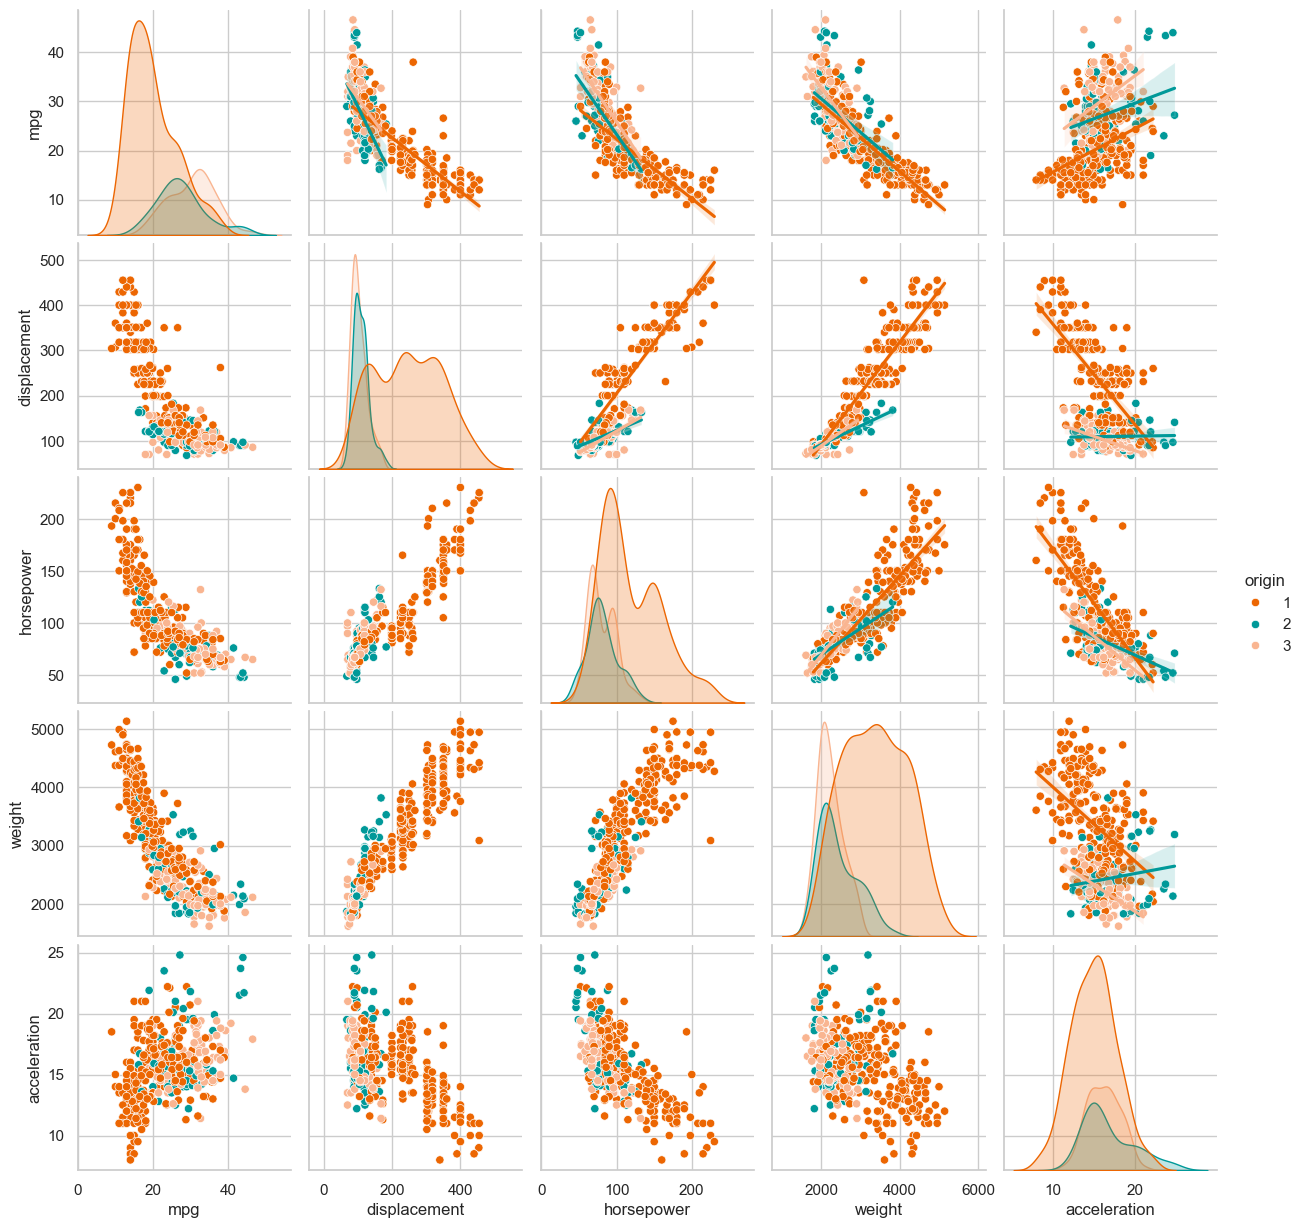

In [15]:
g = sns.pairplot(df, diag_kind='kde', hue='origin')
g.map_upper(sns.regplot, scatter=False);

> Hier sieht den Zusammenhang zwischen allen numerischen Variablen miteinander und auf dem Diagnal die Verteilungen, alle Grafiken sind unter 3 Kategorien (Ausprägungen) von "origin" verteilt, nur von dieser Grafik kann man schon einige Erkenntnisse rausziehen, einige sind z.B.:

- `displacement` hat eine starke positive Korrelation mit `horsepower` und `weight`, eine starke negative Korrelation mit `mpg` und eine schwache negative Korrelation mit `acceleration`.
- allgemein alle haben irgendeiner Art Korrelation mit anderen außer `acceleration` was immer sehr schwache Korrealtion hat.
- auf dem Diagonal sieht man dass die Daten von `origin == 1` streuen mehr als anderen, aber trotzdem sie sehen schon ein bisschen normalverteilt aus.
- `mpg` inbesondere hat immer negative starke Korrelation außer mit `acceleration` wo nur schwache positive Korrelation gibt.
- was auch sehr interessant zu bemerken ist, dass die in Regplots von `displacement` (z.B. 2x3 und 2x4), sieht man dass die Steigung viel steiler ist in `origin == 1` als in `origin == 2 | 3`. D.h. wenn `horsepower` steigt, steigt `displacement` viel schneller wenn `origin == 1`.

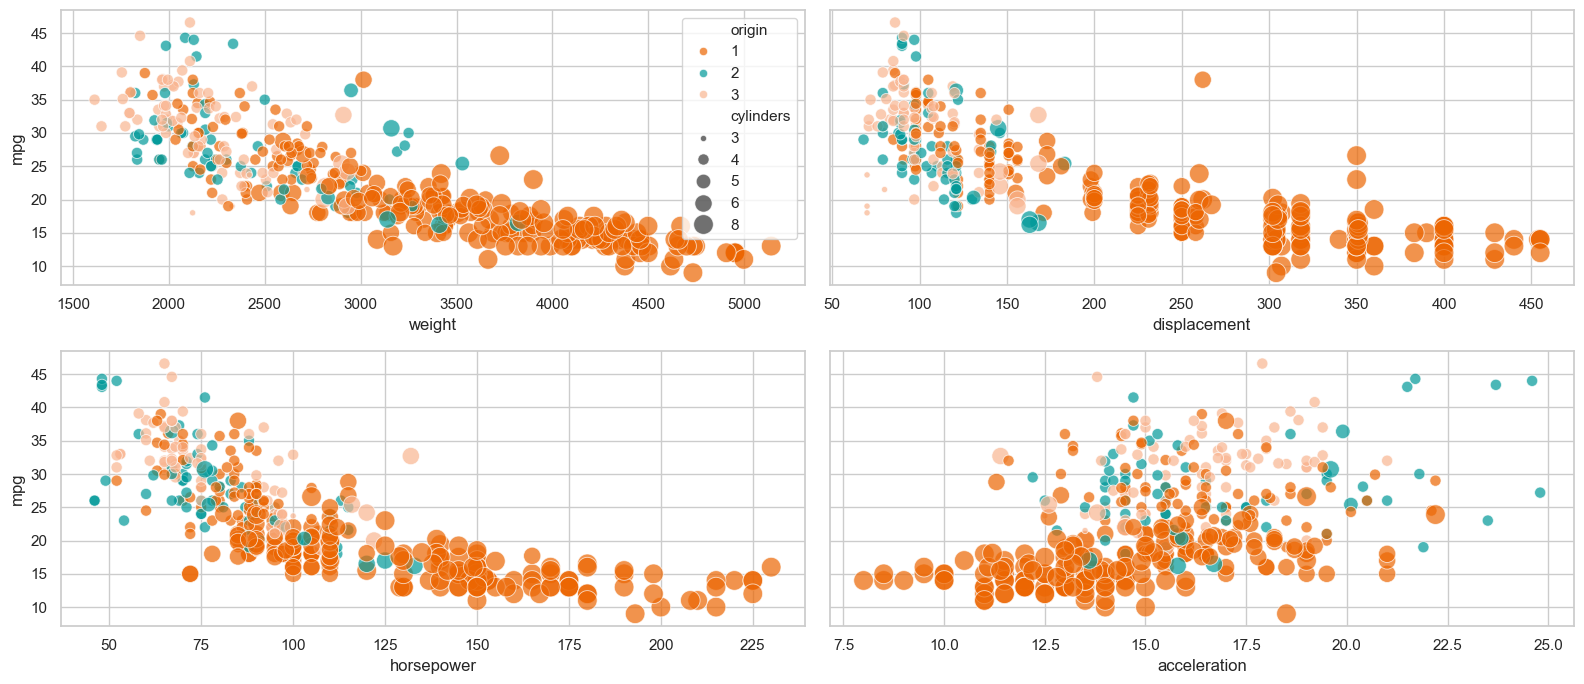

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(16, 7), sharey=True)
axes = ax.flatten()
for i, col in enumerate(['weight', 'displacement', 'horsepower', 'acceleration']):
    ax = axes[i]
    sns.scatterplot(data=df, 
                    x=col, 
                    y='mpg', 
                    hue='origin', 
                    size='cylinders', 
                    sizes=(200, 20),
                    alpha=0.7,
                    ax=ax);
    if i == 0:
        ax.legend(loc='upper right')
    else:
        ax.legend_.remove()
plt.tight_layout()

> hier habe ich versucht 4te Dimension hinzufügen nämlich `cylinders` als Größe der Markers. Und hier sieht man außer der allgemein Korrelation zwischen den Variablen, auch noch die Korrelation von Cylinders, wie es sich verhält innerhalb zwei Variablen. Hier sieht man z.B. mit größen `weight`, `displacement` und `horsepower` bzw. mit kleiner `acceleration` wird es immer größer.

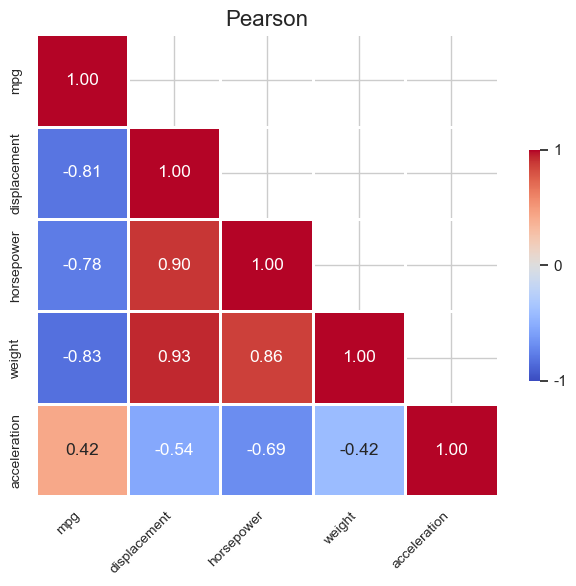

In [17]:
num_corr_heatmap(df.corr(numeric_only=True))

> Übrigens sieht man hier genauso was man oben schon notiert hat, aber das ist halt hier ingesamt und oben war es in drei verteilt. Das macht schon ein bisschen Unterschied z.B. oben hatten wir bemerkt dass zwischen `acceleration` und allen anderen Variablen nur sehr schwache negative bzw positive Korrelation gibt, hier ist aber schon mittlere zu hohere Korrelation. Ich finde aber was wir oben in Grafik gesehen haben ist genauer, weil dort haben wir wegen der Unterverteilung der Kategorien von `origin` besseren Überblick bekommen.

### origin vs num_cols

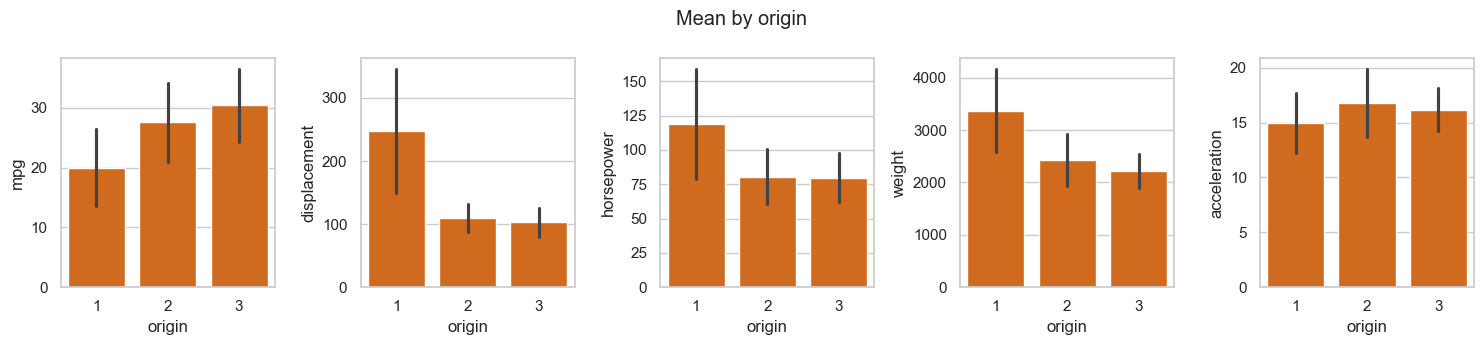

In [18]:
plot_bar_against(df, 'origin', num_cols);

> Hier seiht man ungefähr, außer in `displacement`, es gibt nicht so einen großen Unterschied in den Mittelwerten von allen Kategorien, `origin == 1` hat jedoch mehr streuen in den Daten und auch unterscheidet oft mit den anderen Beiden.

### cylinders vs num_cols

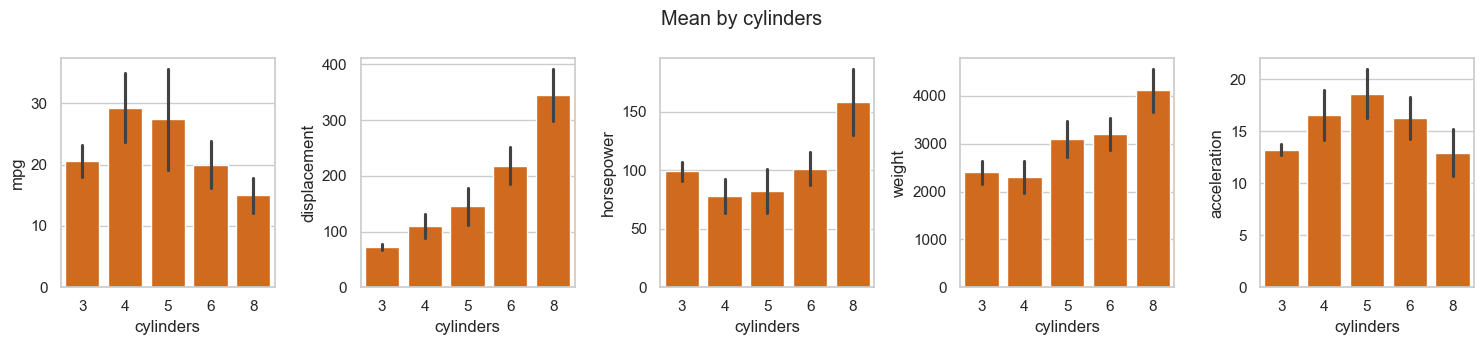

In [19]:
plot_bar_against(df, 'cylinders', num_cols);

> Hier sieht man nicht so einen guten Zusammenhang was man vom anzahl der cylinders erwarten würde, jedoch sieht man positive Korrelation mit `displacement`. Sonst was noch interessant ist, dass `acceleration` in der Mitte maximal ist und nicht bei maximaler Anzahl von Cylindern.

### year vs num_cols

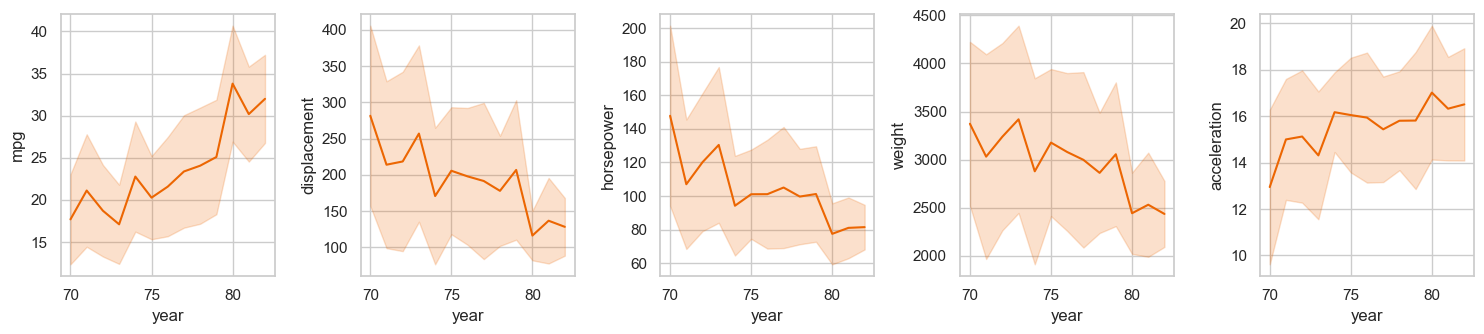

In [20]:
plot_line_against(df, 'year', num_cols);

> Über den Jahren gibt es fast keine klare Entwicklung, was ich auch komisch finde, vllt. liegt es an einer anderen Variablen, wahrscheinlich an `origin`, können wir mal anschauen...

### origin vs year

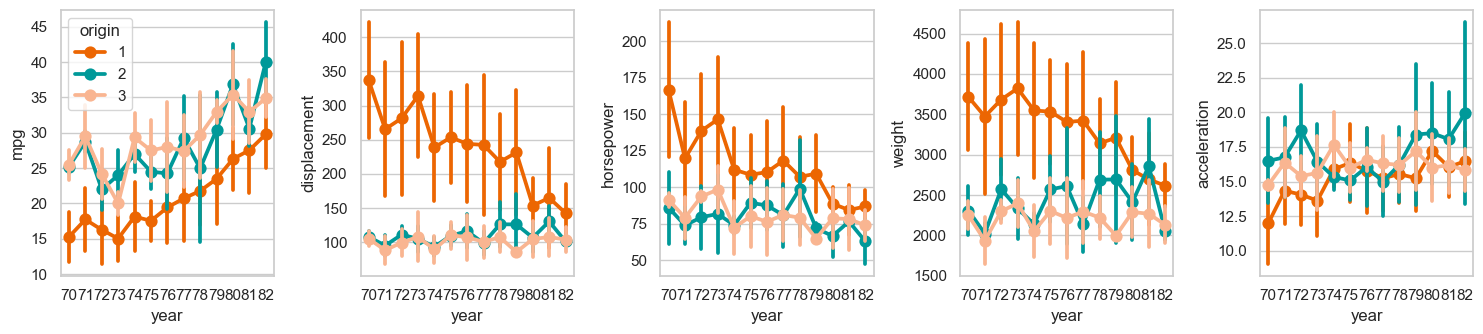

In [21]:
plot_point_against(df, 'year', num_cols, hue='origin');

> Nein, jetzt noch schlechter, vllt. sieht man dass für `origin == 1`, `mpg` hat sich ständig verbessern, aber sonst, kann man nichts daraus was sagen.

### year vs cylinders

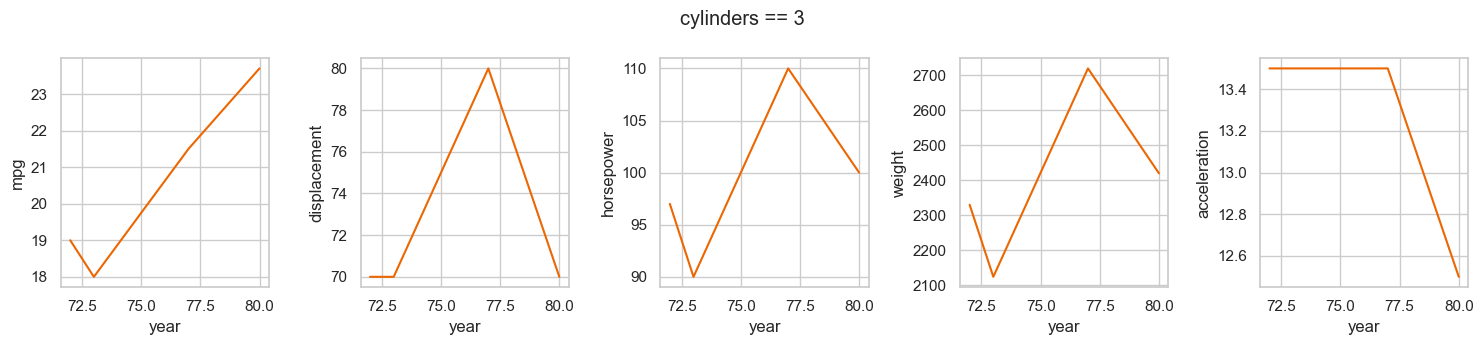

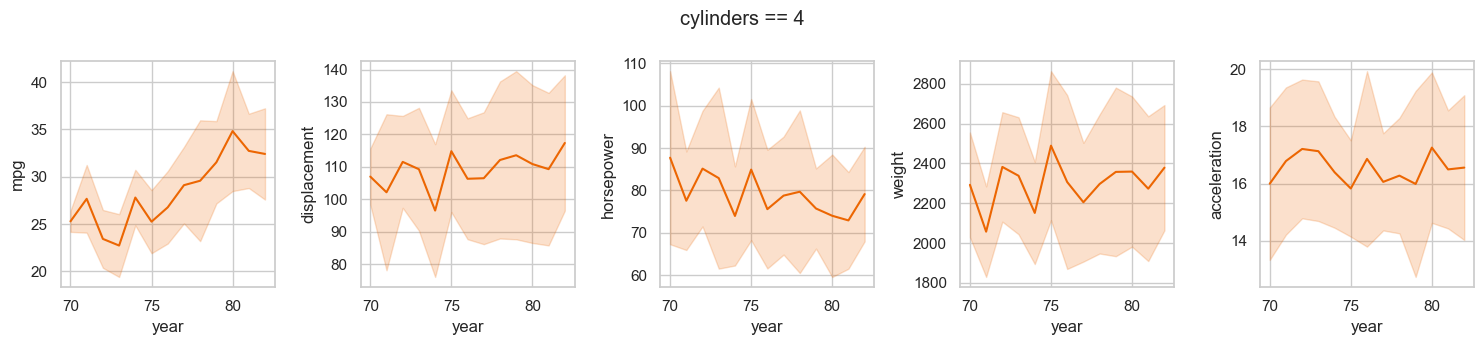

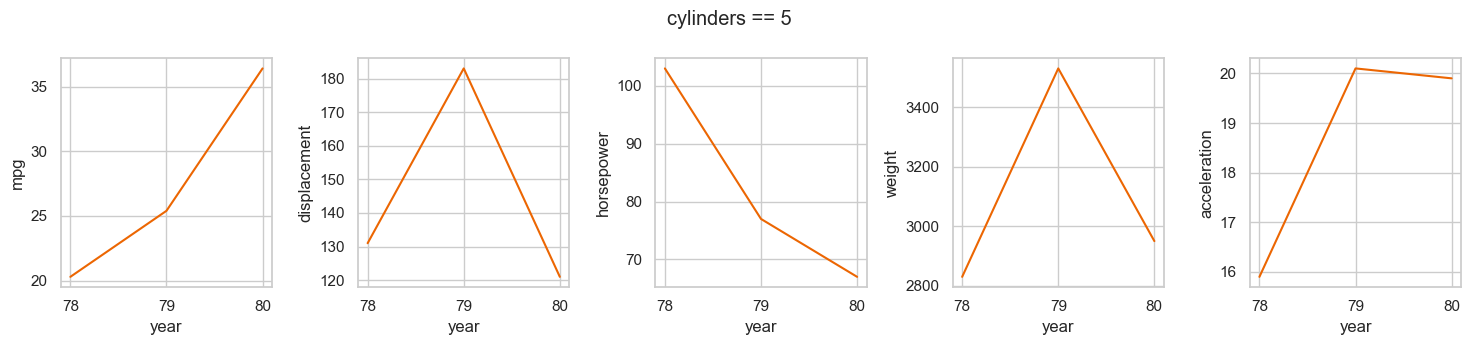

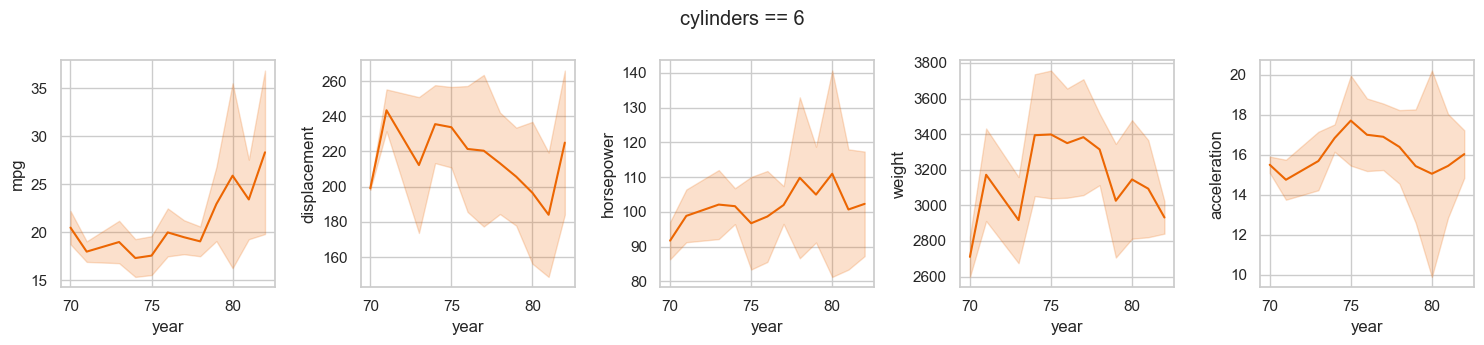

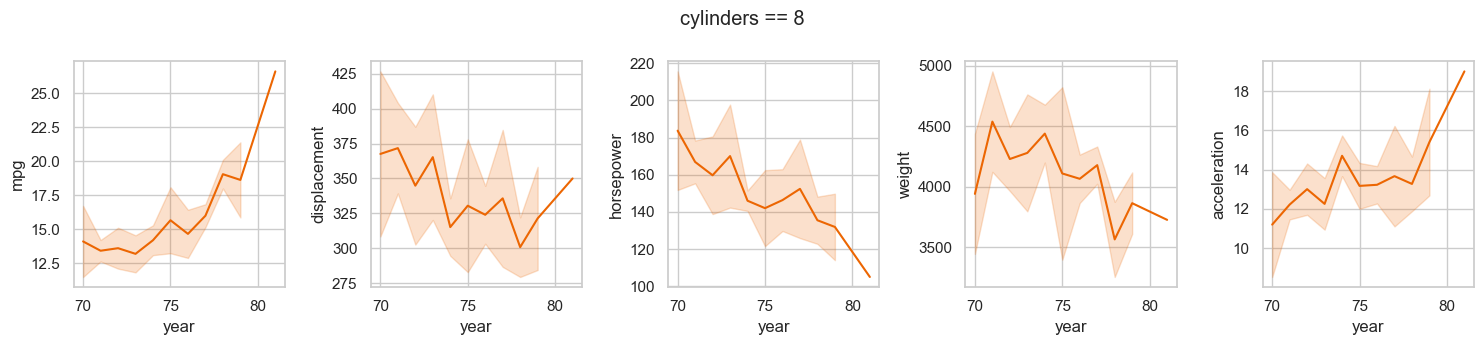

In [22]:
for cyl in df.cylinders.cat.categories:
    plot_line_against(df[df.cylinders == cyl], 'year', num_cols, title=f'cylinders == {cyl}')

> hier sieht man kein eindeutiges Muster, sehr größe Standardfehler zeigt, dass was man hier als Muster sieht, ist tatsächlich sehr sehr schwach und hat keine Bedeutung.

### origin vs cylinders

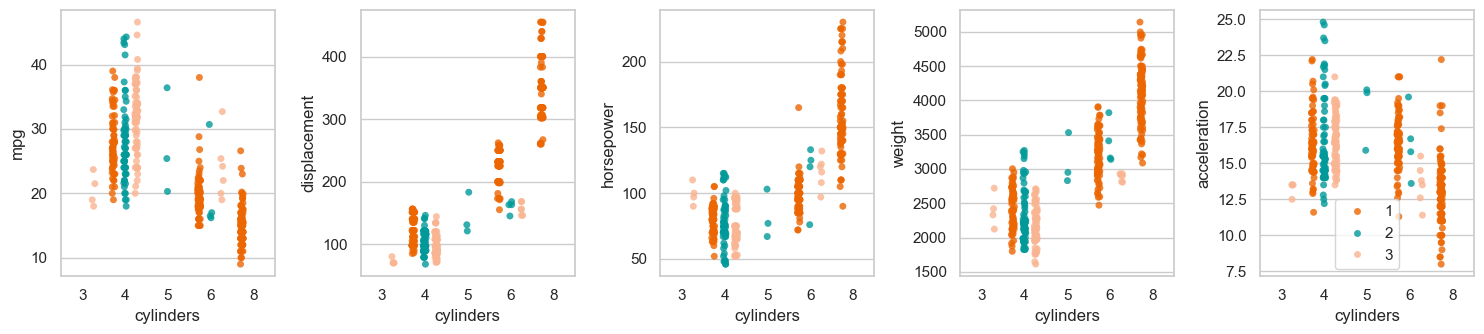

In [23]:
plot_strip_against(df, 'cylinders', num_cols, hue='origin')

> hier gibt es auch kein auffälliges Muster.

f) Angenommen, wir möchten den Benzinverbrauch (mpg) auf Basis der anderen Variablen vorhersagen. Deuten Ihre Diagramme darauf hin, dass eine der anderen Variablen nützlich sein könnte, um mpg vorherzusagen? Begründen Sie Ihre Antwort.

In [24]:
matrix = cramers_v_matrix(df.drop(columns=['name']))
matrix

,cylinders,year,origin,mpg,displacement,horsepower,weight,acceleration
cylinders,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,0.212926,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
origin,0.470543,0.172609,1.000000,NaN,NaN,NaN,NaN,NaN
mpg,0.588683,0.368085,0.426192,1.000000,NaN,NaN,NaN,NaN
displacement,0.772037,0.256948,0.477631,0.619782,1.000000,NaN,NaN,NaN
horsepower,0.629020,0.275415,0.396274,0.612932,0.711823,1.000000,NaN,NaN
weight,0.631784,0.216699,0.424016,0.631509,0.745941,0.618951,1.000000,NaN
acceleration,0.392393,0.199079,0.202135,0.298665,0.383589,0.416674,0.292963,1.0


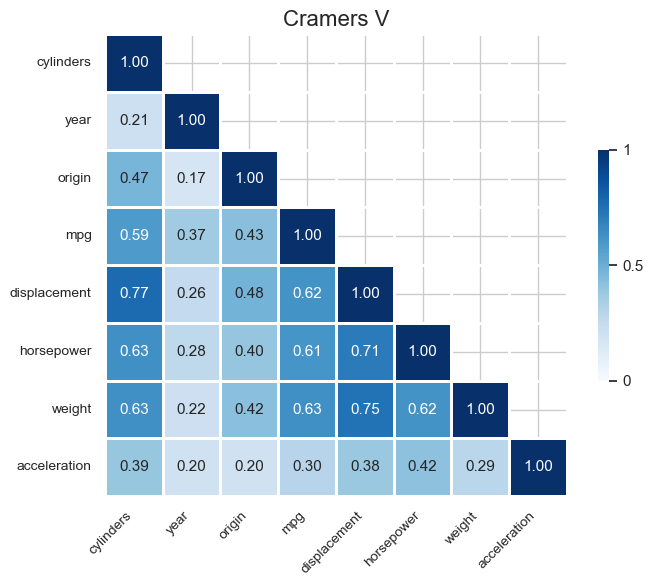

In [25]:
cat_corr_heatmap(matrix)

> hier sieht man die Cramer's V Korrelation zwischen allen Variablen, aber uns interessiert hier nur `mpg` vs kategoriale Variablen, weil die Korrelation mit numerischen Variablen haben wir schon oben angeschaut. Also `mpg` hat mittlere zu hohere Korrelation mit `cylinders`, eine mittlere Korrelation mit `origin` und eine schwache Korrelation mit `year`.

> Um Benzinverbrauch vorherzusagen, die Variablen, die ich benutzen würde sind die numerischen Variablen `weight`, `horsepower` und `displacement` und die kategorischen Variablen `cylinders` und `origin`. Es ist schon öffentsichlich warum man diese Variablen wählen soll, weil sie gute irgendeineartige Zusammenhang mit `mpg` haben, außer vllt. `origin` was eine mittlere Korrelation hat, aber trotzdem kann nutzlich sein.